# Part1 : Exploratory Data Analysis (EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 전체 null 값 확인
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1. How many Survived?

Survived = 1인 경우 생존, Survived = 0인 경우 사망

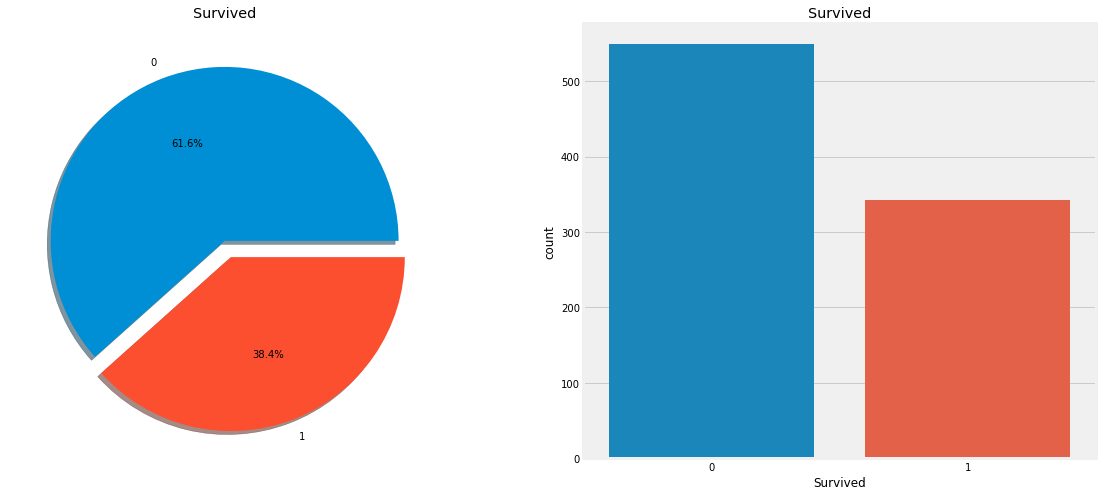

In [5]:
f,ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

사고에서 살아남은 사람보다 사망한 사람이 더 많다. 전체 데이터의 약 38.4%의 승객만이 사고에서 생존했다.

## 2. Types Of Features

범주형 변수 : 범주가 두 개 이상이고 해당 기능의 각 값을 범주별로 분류할 수 있는 변수. ex) 성별은 두 범주(남성/여성)를 갖는 범주형 변수

데이터 세트의 범주형 변수 - Sex, Embarked

순서형 변수 : 범주형 변수와 유사하지만, 값들 간에 상대적인 순서를 정하거나 정렬을 할 수 있다는 차이점이 존재한다. ex) Tall, Medium, Short 값이 있는 Height는 순서형 변수

데이터 세트의 순서형 변수 - PClass

연속형 변수 : 두 지점 사이에서 연속적인 값을 가지는 변수.

데이터 세트의 연속형 변수 - Age

## 3. Analysing The Features

### 1) Sex (Categorical Feature)

성별별로 생존자와 사망자를 분석해보자.

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

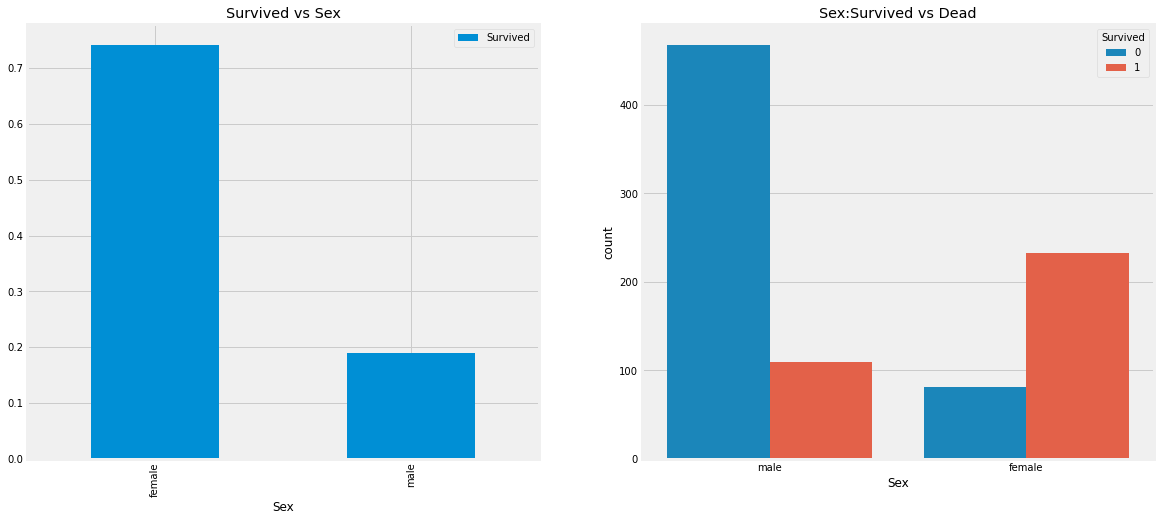

In [7]:
f,ax = plt.subplots(1, 2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

배에 탄 남성의 수는 여성의 수보다 훨씬 많다. 하지만 생존한 여성의 수는 남성의 거의 두 배이다. 여성의 생존율은 75%이고 남성은 19%이다.

### 2) Pclass (Ordinal Feature)

좌석 등급별로 생존자와 사망자를 분석해보자.

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


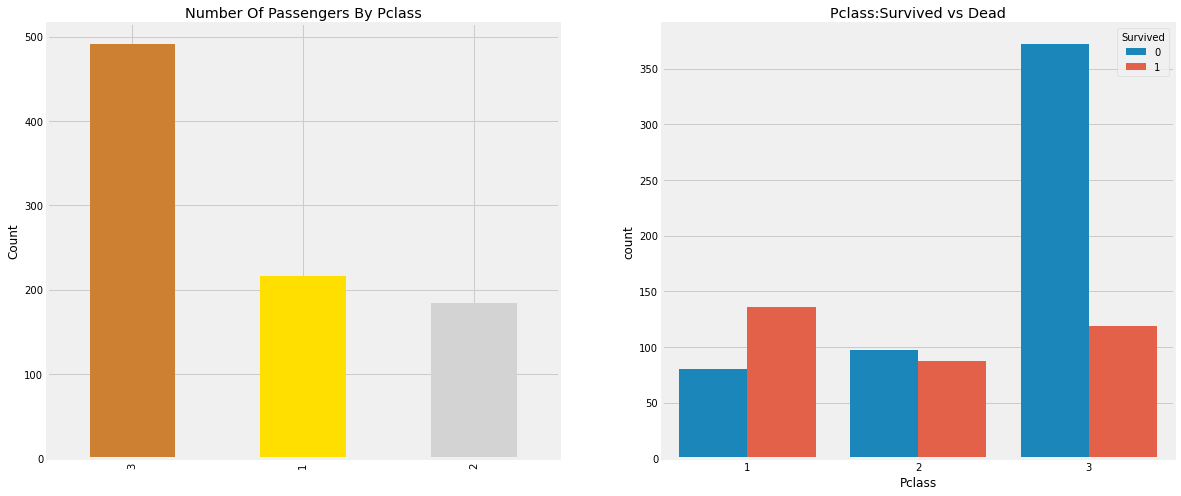

In [9]:
f,ax = plt.subplots(1, 2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

1등석 승객들의 생존율이 매우 높다는 것을 확인할 수 있다. 1등석 승객의 경우 생존율은 약 63%, 2등석의 경우는 48%, 3등석 승객들은 수가 가장 많지만 생존율은 약 25%로 매우 낮다. 

### 3) Sex and Pclass

성별과 좌석 등급별로 생존자와 사망자를 분석해보자.

In [10]:
pd.crosstab([data.Sex,data.Survived], data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

1등석 여성의 경우 94명 중 3명만 사망, 생존율이 96%이다.

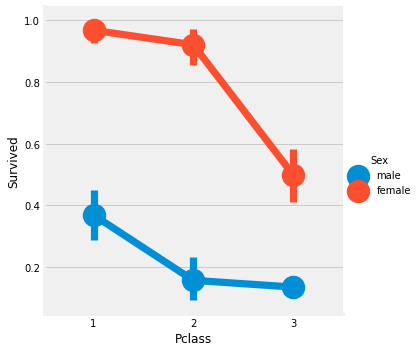

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

좌석 등급과 관계없이 구조받는 동안 여성이 최우선 순위를 가졌음을 확인할 수 있다.

### 4) Age (Continous Feature)

나이에 따른 생존 가능성을 알아보자

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


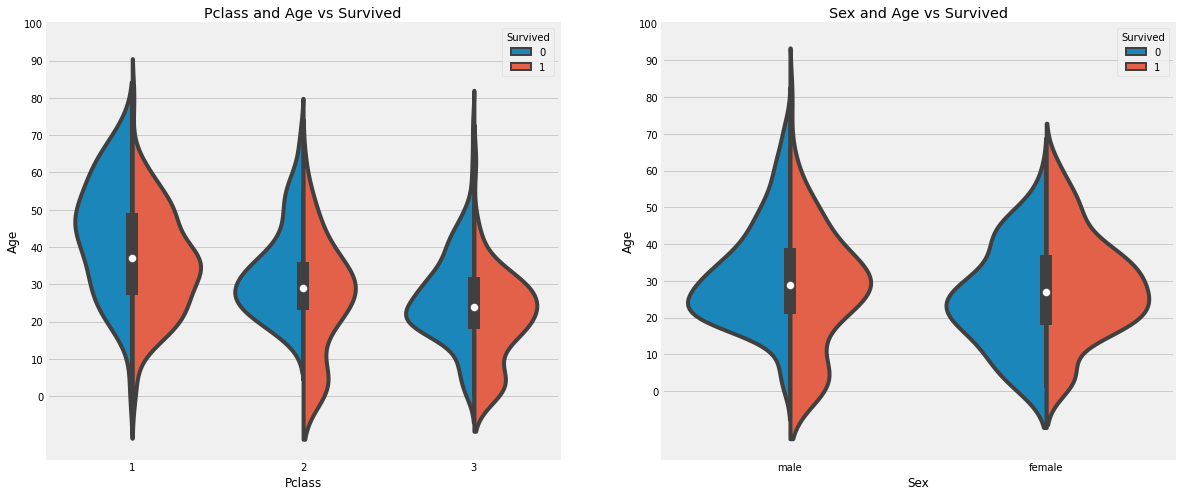

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

좌석 등급이 내려감에 따라 에 따라 어린이의 수 증가, 10세 미만(어린이)의 생존율은 좌석에 관계없이 양호하다.

1등석의 20-50세 승객의 생존 가능성은 높고 여성일수록 더 좋다.

남성의 경우 연령이 증가함에 따라 생존 확률이 감소한다.

Age에는 177개의 null값이 있다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 구해 보자.

문제점 - 다양한 연령대의 사람들이 많다는 것. (평균 나이가 29세인 4살짜리 아이를 배정 할 수 없다)

해결 - 이름 기능을 확인한다. 이름에 Mr 또는 Mrs 등이 있다. 따라서 Mr 및 Mrs의 평균 값을 각 그룹에 할당할 수 있다.

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

정규식을 사용 : [A-Za-z] +) .. 

A-Z 또는 a-z 사이에 있고 뒤에 .(점)이 오는 문자열을 찾는 것. 이름에서 이니셜을 성공적으로 추출하자.

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle 또는 Mme와 같이 Miss를 나타내는 잘못된 이니셜들은 Miss로 바꾼다.

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [18]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any() #So no null values left finally 

False

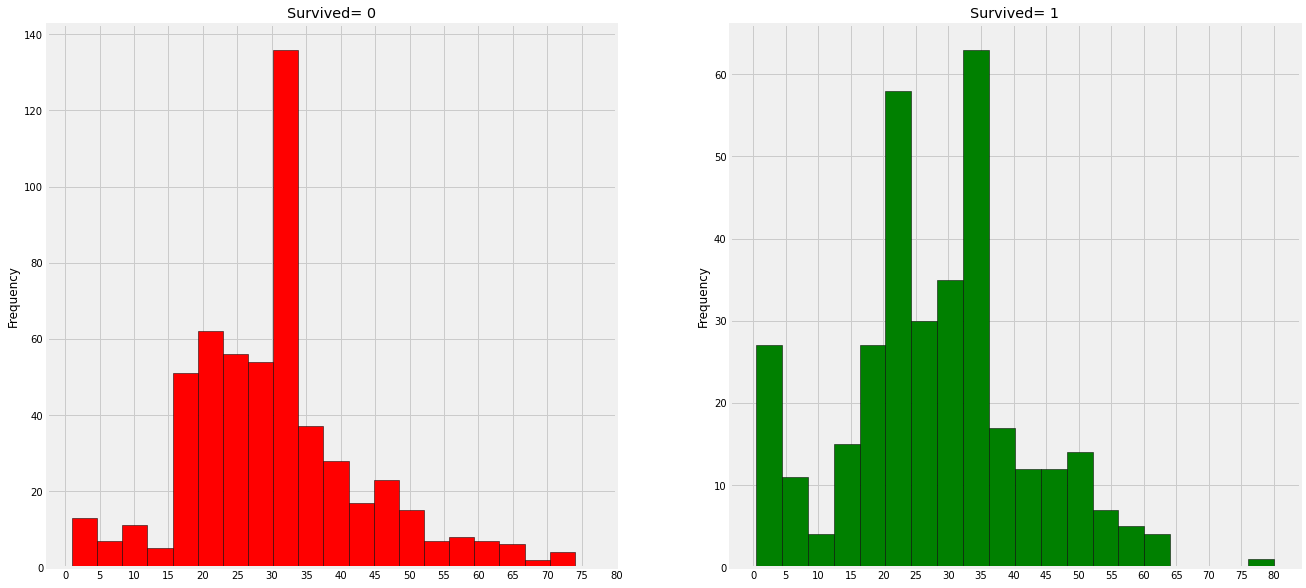

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

결과

유아(5세 미만)가 많이 생존했다 / 가장 나이 많은 승객이 생존했다(80세) / 최대 사망자 수는 30-40세 그룹이다

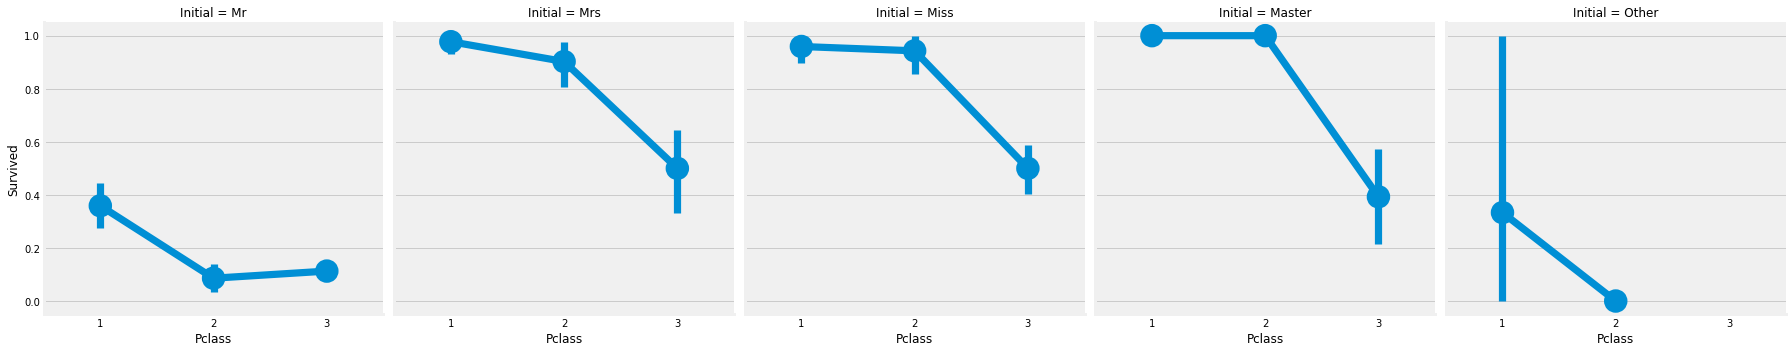

In [21]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

여성과 아동 우선 정책은 계급에 관계없이 유효하다

### 5) Embarked (Categorical Value)

승선항에 따른 생존 가능성을 알아보자

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port Of Embarkation

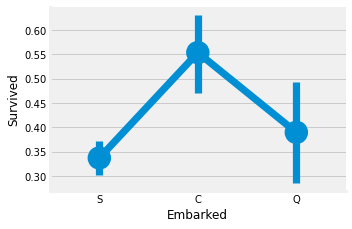

In [23]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

포트 C의 생존 가능성은 약 0.55로 가장 높고, S의 경우 가장 낮다.

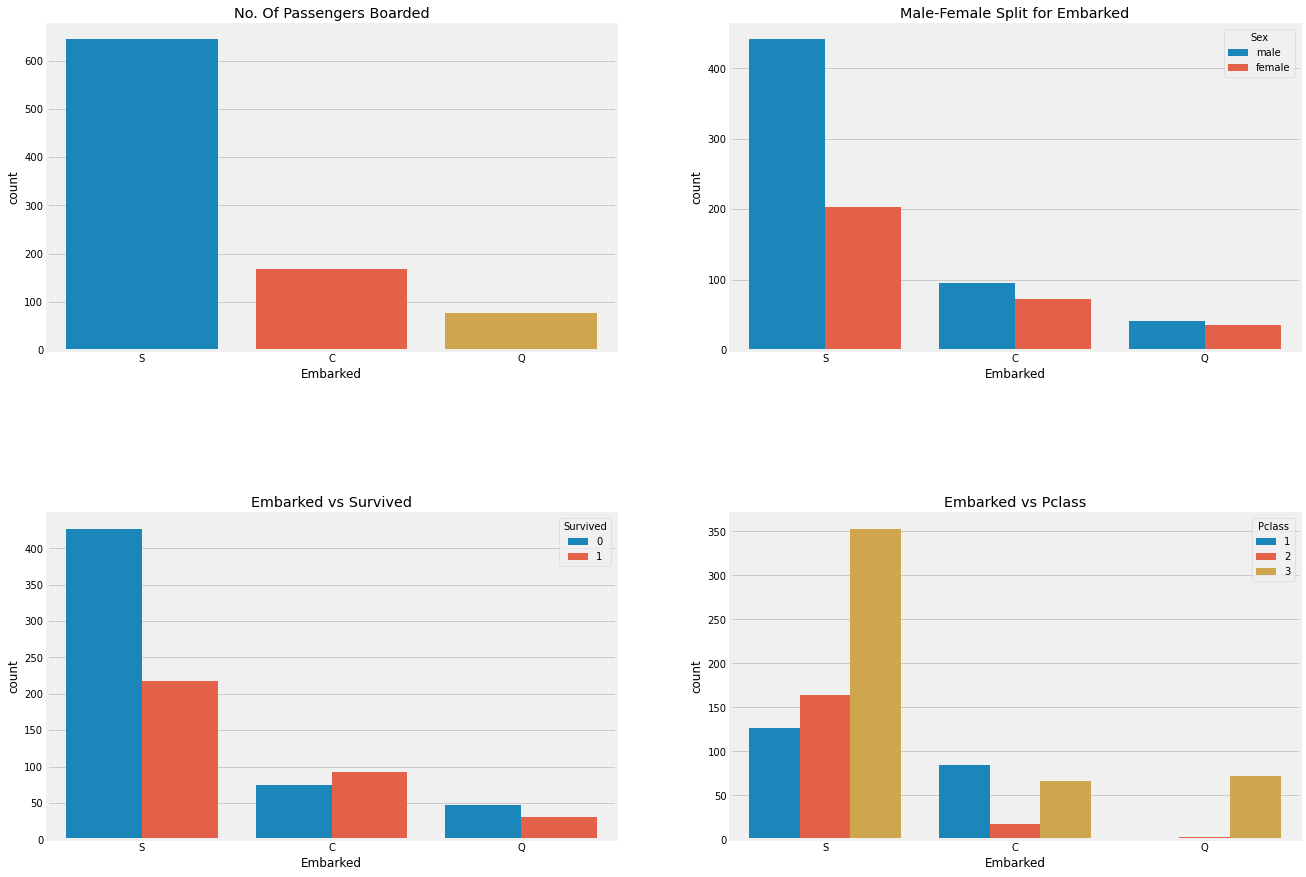

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

S에서 탑승한 사람의 대부분은 3등석이다

C에서 온 승객들은 살아남은 비율이 더 많다. 이유는 아마 1등석과 2등석 승객이 많아서일 것.

S는 대부분의 부자들이 탑승했지만, 여전히 생존 가능성이 낮다. 3등석 승객이 81% 정도 생존하지 못했기 때문이다.

Q는 승객의 거의 95%가 3등석이다

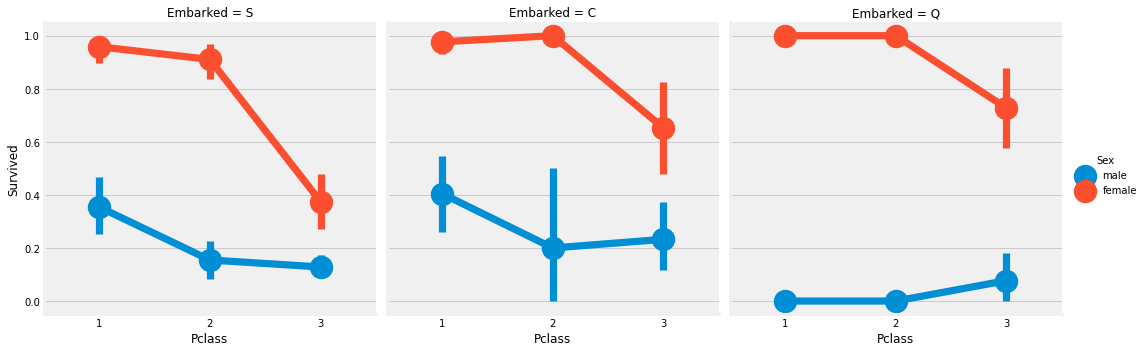

In [25]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

좌석에 관계없이 1등석과 2등석 여성의 생존 확률은 거의 1이다.

남성과 여성 모두 생존율이 매우 낮기 때문에 포트 S는 3등석 승객에게 매우 불행한 것으로 보인다.

거의 대부분이 3등석이기 때문에 포트 Q는 남성에게 가장 불행해 보인다.

#### Filling Embarked NaN

포트 S에서 탑승한 승객이 최대이므로 NaN을 모두 S로 대체한다.

In [26]:
data['Embarked'].fillna('S',inplace=True)

In [27]:
data.Embarked.isnull().any()  # Finally No NaN values

False

### 6) SibSip (Discrete Feature)

승객이 혼자인지 가족과 함께 탔는지를 나타낸다.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [28]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


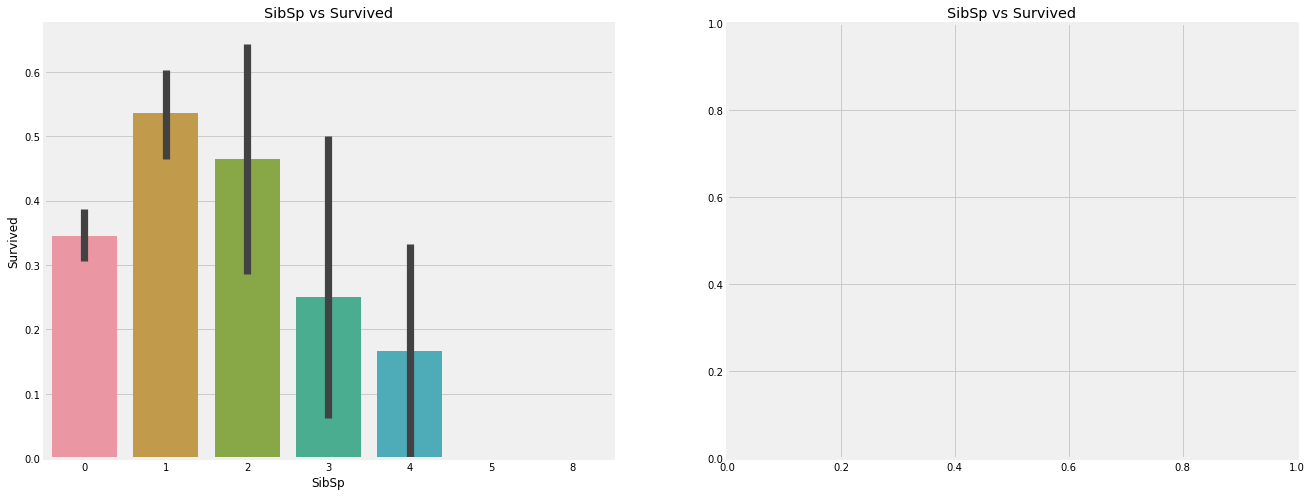

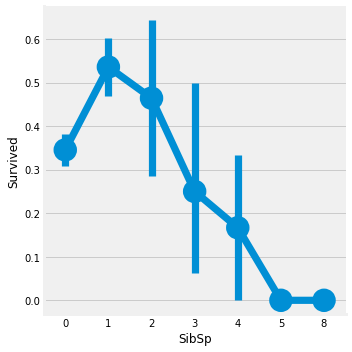

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(0)
plt.show()

In [30]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


승객이 형제 없이 혼자 탑승할 경우 생존율이 34.5 %임을 보여준다. 형제자매의 수가 증가하면 생존율은 대략 감소한다. 즉, 가족이 있다면 자신보다 가족들을 먼저 구하려고 노력했을 것이다. 5-8인 가족의 생존율은 0%입니다. 그 이유는?

좌석 등급 때문이다. 교차 분석은 SibSp > 3인 사람이 모두 3등석에 있음을 보여줍니다. 3등석(> 3)의 모든 대가족이 사망한 것이다.

### 7) Parch

In [31]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


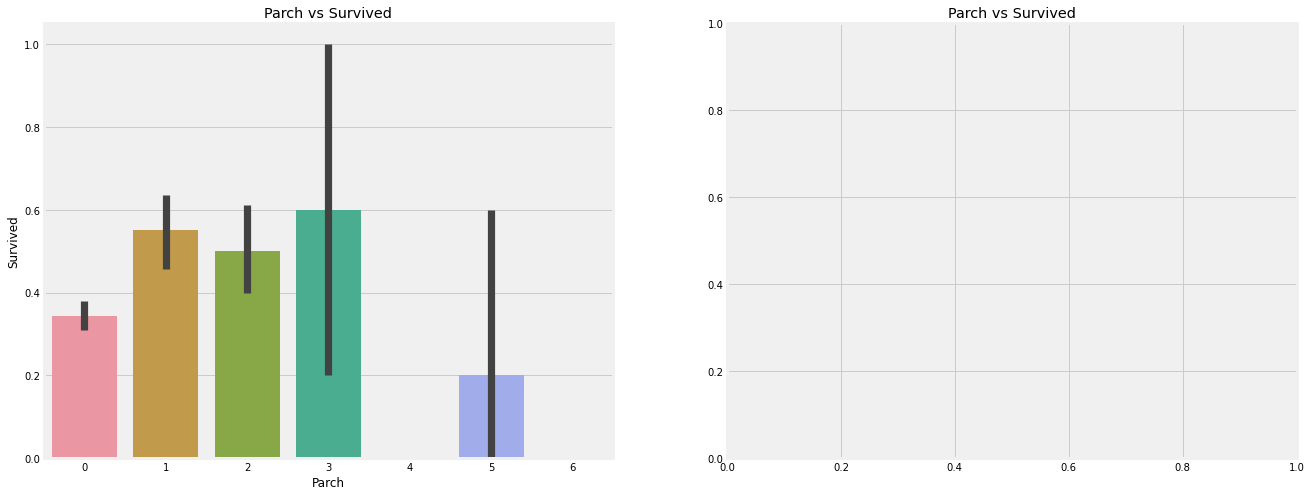

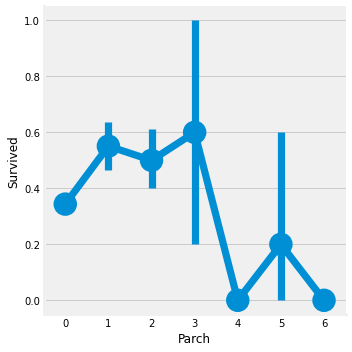

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(0)
plt.show()

결과는 유사하다. 부모와 함께 탑승한 승객은 생존 가능성이 더 높다. 그러나 가족의 숫자가 증가함에 따라 생존율은 감소한다.

배에 1-3명의 부모가 있는 사람은 생존 가능성이 좋다. 혼자 있는 것은 생존율이 나쁘며 배에 4명 이상의 부모가 있을 때도 생존 가능성이 줄어든다.

### 8) Fare (Continous Feature)

배에서 사용한 비용(티켓값 등등)에 따른 생존 가능성을 비교해보자

In [33]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


최저 운임 비용은 0달러

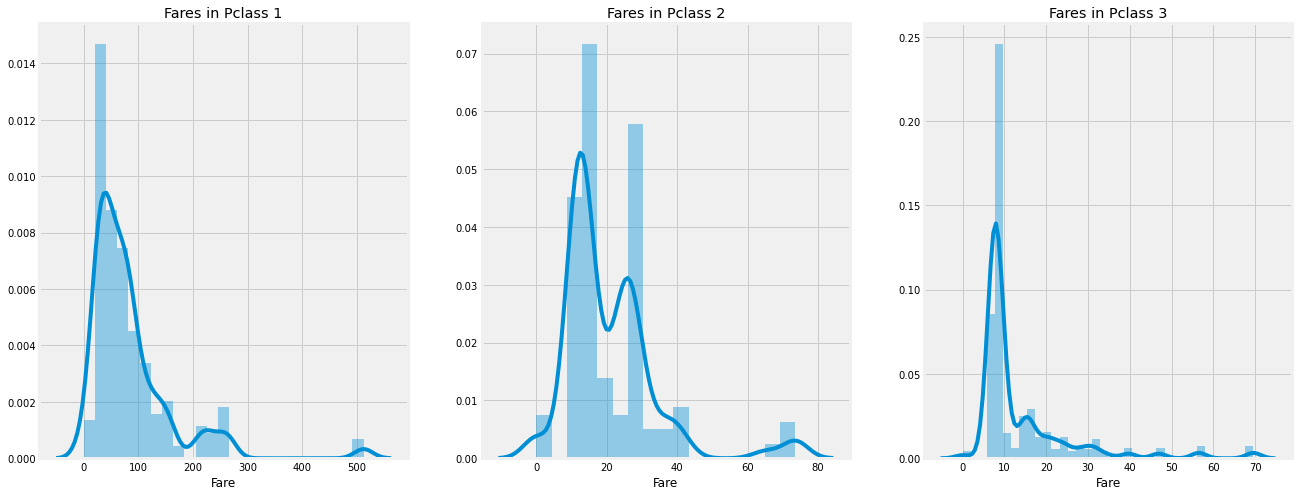

In [34]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

1등석의 승객 요금에 큰 분포가 있는 것으로 보이며 이 분포는 표준이 감소함에 따라 계속 감소합니다. 연속적인 값이므로 이산 값으로 변환할 수 있다.

총 분석 결과)

Sex : 여성의 생존 가능성은 남성에 비해 높다.

Pclass : 1등석 승객이 되는 것이 더 나은 생존 기회를 제공한다 경향이 있다. 3등석 승객의 생존율은 매우 낮다. 여성의 경우 1등석의 생존 확률은 거의 1이며 2등석의 생존 확률도 높다.

Age : 5-10세 미만의 어린이는 생존 가능성이 높다. 15세에서 35세 사이의 승객들이 많이 사망했다.

Embarked : 1등석 승객의 대부분이 S에서 탔음에도 불구하고 C에서 탄 승객들의 생존 가능성이 더 나은 것으로 보인다. Q의 승객은 모두 3등석이다.

Parch + SibSp : 1-2명의 형제 자매, 배우자 또는 1-3명의 부모가 있는 경우 혼자 있거나 대가족이 함께 여행하는 것보다 생존 확률이 더 높다.

### 9) Correlation Between The Features

상관 관계를 분석해보자

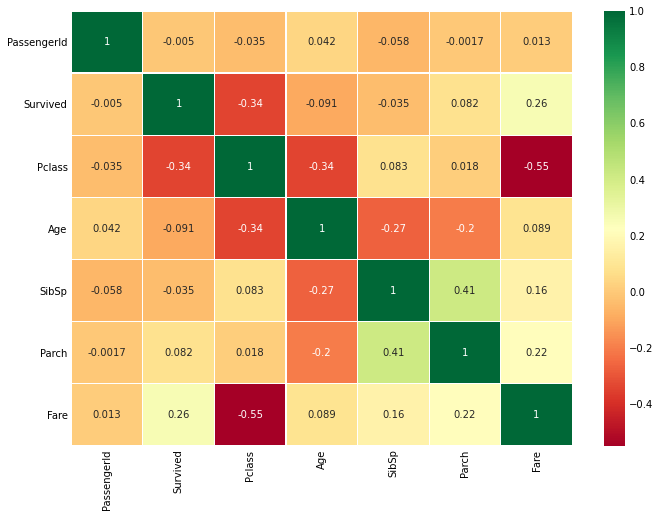

In [35]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

알파벳이나 문자열 사이의 상관 관계는 없기 때문에 숫자로 된 특성만 비교된다. 플롯을 이해하기 전에 정확히 상관 관계가 무엇인지 살펴 보자.

양의 상관 관계 : 기능 A의 증가가 기능 B의 증가로 이어지는 경우 양의 상관 관계가 있다. 값 1은 완벽한 양의 상관 관계를 의미.

음의 상관 관계 : 기능 A의 증가가 기능 B의 감소로 이어지는 경우 음의 상관 관계이다. 값 -1은 완벽한 음의 상관 관계를 의미.

두 기능이 거의 또는 완벽하게 상관 관계가 있어서 한 기능이 증가하면 다른 기능이 증가한다고 가정해 보자. 이는 두 기능 모두 매우 유사한 정보를 포함하고 있으며 정보의 변동이 거의 또는 전혀 없음을 의미한다. 둘 다 거의 동일한 정보를 포함하므로 이를 MultiColinearity라고 한다.

훈련 시간과 많은 이점을 감소시키므로 모델을 만들거나 훈련하는 동안 중복 기능을 제거해야 한다.

위의 히트 맵에서 기능이 크게 상관되지 않음을 알 수 있다. 가장 높은 상관 관계는 SibSp와 Parch, 0.41이다. 따라서 모든 기능을 계속해서 분석할 수 있다.

# Part2 : Feature Engineering and Data Cleaning

## 1. Age_band

나이는 연속형 변수이므로 다루기 힘들다. 따라서 연속적인 값을  범주 값으로 변환해야 한다. -> 연령 범위를 단일 구간으로 그룹화하거나 단일 값을 할당한다.

승객의 최대 연령은 80세이므로 0-80의 범위를 5개의 구간으로 나눈다. 80 / 5 = 16

In [36]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


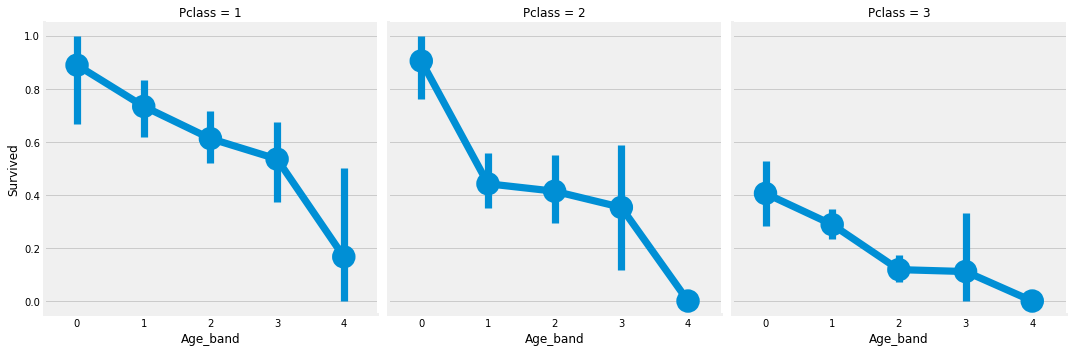

In [38]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

## 2. Family_Size and Alone

Parch와 SibSp을 요약해서 "Family_size" 및 "Alone"이라는 새 기능을 만들어 보자. 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 데이터를 결합한다. Alone은 승객이 혼자인지 아닌지를 나낸다.

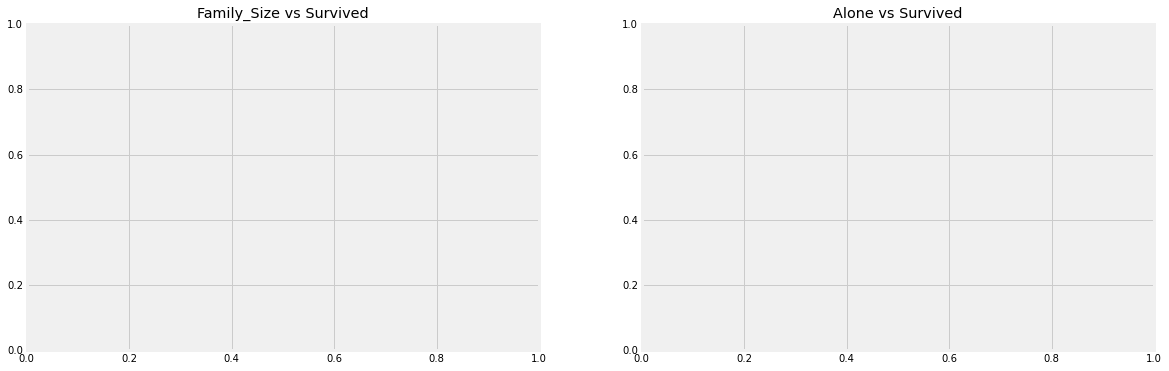

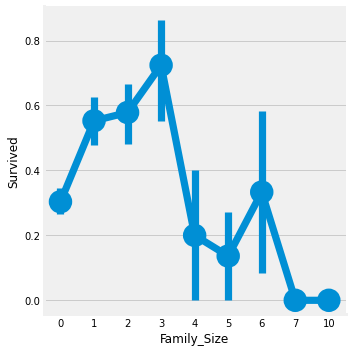

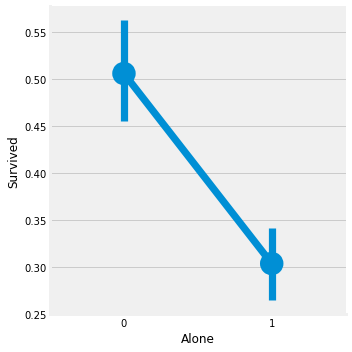

In [39]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(0)
plt.show()

Family_Size=0은 승객이 혼자임을 의미한다. Alone이거나 family_size=0이면 생존 가능성이 매우 낮다. family size > 4 인 경우에도 생존율이 감소한다.

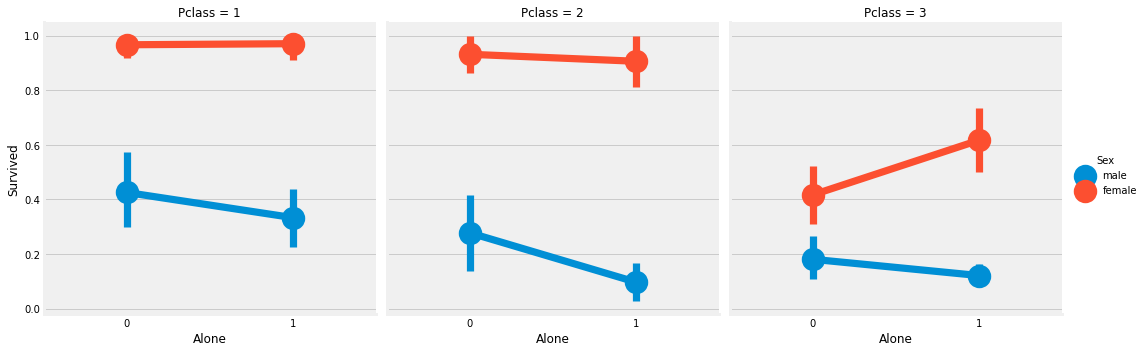

In [40]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

가족이 있는 여성보다 혼자 있는 여성의 생존율이 높은 3등석을 제외하고는 혼자 있으면 성별이나 Pclass에 관계없이 생존율이 나쁘다는 것을 알 수 있다.

## 3. Fare_Range

fare도 연속적이므로 이를 변환해야 한다. 이를 위해 pandas.qcut을 사용한다.

5개의 빈을 전달하면 5개의 별도 빈 또는 값 범위에 균등한 간격으로 값이 정렬된다.

In [41]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


fare_range가 증가할수록 생존 가능성이 증가한다는 것을 알 수 있다.

In [42]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

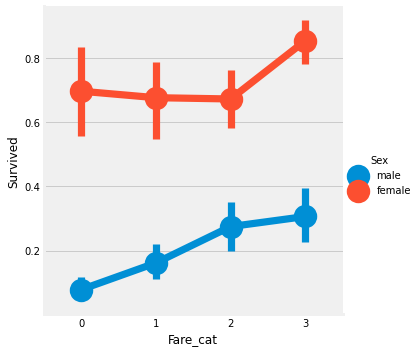

In [43]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

Fare_cat이 증가하면 생존 확률이 증가한다.

## 4. Converting String Values into Numeric

machine learning model에 문자열을 전달할 수 없기 때문에 Sex, Embarked 등의 변수를 숫자 값으로 변환한다

In [44]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

불필요한 변수 삭제 

Name -> 카테고리 값으로 변환 할 수 없으므로 필요하지 않음

Age -> Age_band가 있으므로 필요하지 않음

Ticket -> 분류할 수없는 임의의 문자열이다

Fare -> Fare_cat이 있음

Cabin -> 많은 NaN 값과 passengers가 여러 개의 Cabin을 가지고 있음. 불필요

Fare_Range -> fare_cat이 있음

PassengerId -> 분류할 수 없음

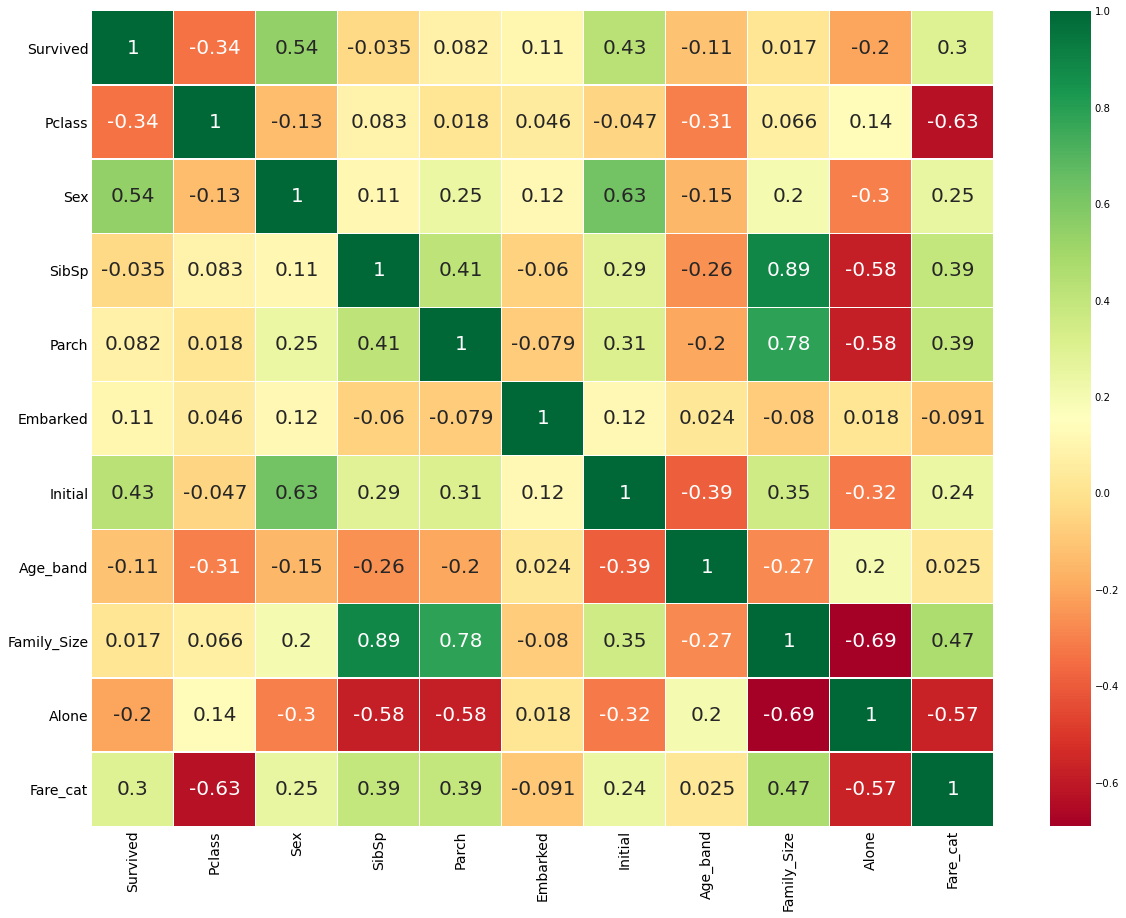

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

positively related된 변수들 : SibSp와 Family_Size, Parch와 Family_Size 등

negatively related : Alone와 Family_Size 등

# Part3 : Predictive Modeling

## 1. 모델링1

### 1) 학습 & 정확도 확인

EDA 부분에서 몇 가지 정보를 얻었지만 그것만으로는 승객이 살아남을 것인지 죽을 것인지 정확하게 예측하거나 말할 수 없다. 추가적인 분류 알고리즘을 사용하여 승객이 생존할지 여부를 예측해야 한다.

1) Logistic Regression

2) Support Vector Machines(Linear and radial)

3) Random Forest

4) K-Nearest Neighbours

5) Naive Bayes

6) Decision Tree

7) Logistic Regression

In [46]:
# 필요한 모든 패키지 가져오기
from sklearn.linear_model import LogisticRegression   # logistic regression
from sklearn import svm                               # support vector Machine
from sklearn.ensemble import RandomForestClassifier   # Random Forest
from sklearn.neighbors import KNeighborsClassifier    # KNN
from sklearn.naive_bayes import GaussianNB            # Naive bayes
from sklearn.tree import DecisionTreeClassifier       # Decision Tree
from sklearn.model_selection import train_test_split  # training and testing data split
from sklearn import metrics                           # accuracy measure
from sklearn.metrics import confusion_matrix          # for confusion matrix

In [47]:
train,test = train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

#### 1. Radial Support Vector Machines (rbf-SVM) - 방사형 서포트벡터 머신

In [48]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


#### 2. Linear Support Vector Machine (linear-SVM) - 선형 서포트벡터 머신

In [49]:
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### 3. Logistic Regression - 로지스틱 회귀

In [50]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


#### 4. Decision Tree - 결정 트리

In [51]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


#### 5. K-Nearest Neighbours (KNN)

In [52]:
model = KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


n_neighbours value를 변경하면 KNN 모델의 정확도가 변경된다(기본값은 5). n_neighbours의 다양한 값에 대한 정확도를 확인한다.

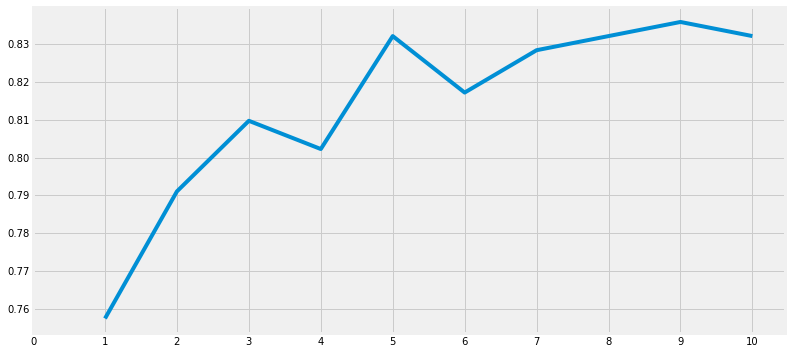

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [53]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

#### 6. Gaussian Naive Bayes - 가우시안 나이브베이즈

In [54]:
model = GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#### 7. Random Forests - 랜덤 포레스트

In [55]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


### 2) 검증

#### 1. Cross Validation - 교차 검증

1) K-Fold Cross Validation은 먼저 데이터 세트를 k-subset으로 나누는 방식으로 작동한다.

2) 데이터 세트를 (k = 5) 부분으로 나눈다고 가정해 보자. 테스트를 위해 1개 부분을 남겨두고 4개 부분에 대해 알고리즘을 훈련한다.

3) 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 교육하여 프로세스를 계속한다. 그런 다음 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻는다.  -> 이를 K-Fold Cross Validation이라고 함

4) 알고리즘은 일부 훈련 데이터의 경우 데이터 세트에 대해 과소적합 또는 과적합 할 수도 있다. 그러나 Cross Validation을 통한다면 일반화 된 모델을 얻을 수 있다.

In [56]:
from sklearn.model_selection import KFold             # K-fold cross validation
from sklearn.model_selection import cross_val_score   # score evaluation
from sklearn.model_selection import cross_val_predict # 예측

kfold = KFold(n_splits=10, random_state=22)            # k=10, 데이터를 10 개의 동일한 부분으로 분할
xyz = []
accuracy = []
std = []

classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
# 훈련 진행
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold,scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.805843,0.026075
Naive Bayes,0.801386,0.028999
Random Forest,0.810375,0.033148


구한 데이터로 그래프 그려보기

<AxesSubplot:>

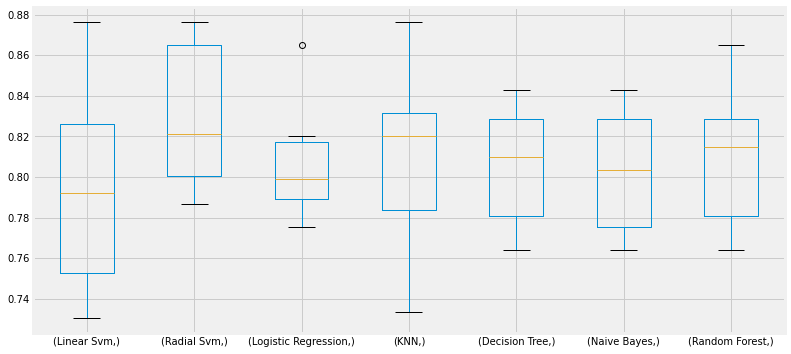

In [57]:
plt.(figsize=(12,6))
box = pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

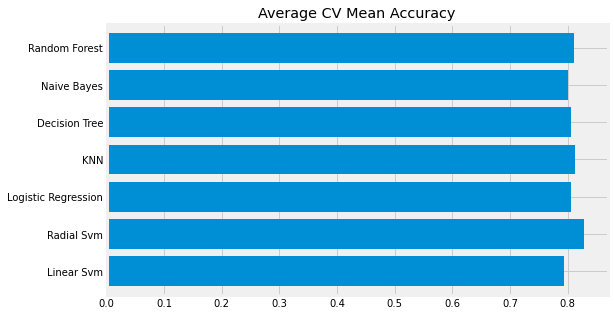

In [58]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

imbalance로 인해 분류 정확도가 잘못될 수 있다. 이 때는 모델이 잘못된 곳이나 모델이 잘못 예측한 클래스를 보여주는 confusion matrix로 요약 된 결과를 얻을 수 있다.

#### 2. Confusion Matrix - 혼동행렬

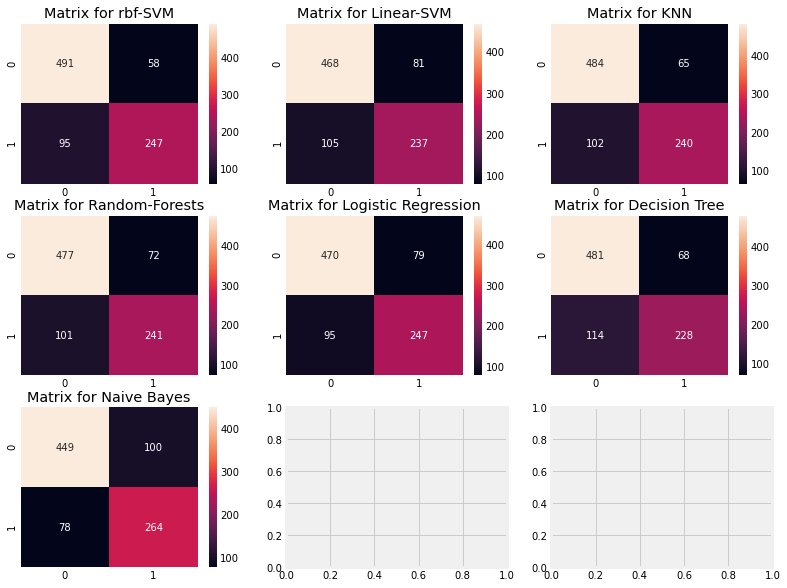

In [59]:
f,ax = plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

왼쪽 대각선은 각 클래스에 대한 올바른 예측 수를 보여주고 오른쪽 대각선은 잘못된 예측 수를 보여준다. rbf-SVM에 대한 첫 번째 플롯을 고려해 보자.

1) 정확한 예측의 수는 491 (죽음의 경우) + 247 (생존의 경우)이며 평균 CV accuracy는 (491 + 247) / 891 = 82.8 %이다.

2) 오류 -> 58명의 사망자를 살아남은 것으로 잘못 분류하고 95명의 생존자를 죽은 것으로 분류했다. 죽은 사람을 산 것으로 예측하며 실수를 더 많이 저질렀다.

모든 행렬을 살펴보면 rbf-SVM은 사망한 승객을 정확하게 예측할 가능성이 더 높고 NaiveBayes는 생존한 승객을 정확하게 예측할 가능성이 더 높다고 볼 수 있다.

### 3) Hyper-Parameters Tuning

기계 학습 모델은 블랙 박스와 같다. 이 Black-Box에 대한 몇가지 기본 매개 변수 값이 있으며, 이를 조정하거나 변경하여 더 나은 모델을 얻을 수 있다. SVM 모델의 C나 감마와 마찬가지로 비슷하지만 유사하게 다른 매개 변수를 hyper-parameter라고 하며, 알고리즘의 학습률을 변경하고 더 나은 모델을 얻기 위해 튜닝할 수 있다. 이를 Hyper-Parameter Tuning이라고 한다.

#### 1. SVM

In [60]:
from sklearn.model_selection import GridSearchCV
C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf','linear']
hyper = {'kernel':kernel,'C':C,'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   17.8s finished


#### 2. Random Forests

In [61]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   33.4s finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Rbf-Svm의 최고 점수는 (C = 0.05, 감마 = 0.1)일 때 82.82% 이다. RandomForest의 점수는 (n_estimators = 900일 때) 81.8% 이다.

## 2. 모델링2 - Ensemble - 앙상블

Ensembling은 모델의 정확성이나 성능을 높이는 좋은 방법이다. 간단히 말해서, 하나의 강력한 모델을 만들기 위해 다양한 단순 모델의 조합이다.

1) Voting Classifier

2) Bagging

3) Boosting

### 1) Voting Classifier

다양한 단순 기계 학습 모델의 예측을 결합하는 가장 간단한 방법이다. 모든 submodel의 예측을 기반으로 평균 예측 결과를 제공한다. 하위 모델(submodel) 또는 기본 모델(basemodel)은 모두 다른 종류이다.

In [62]:
from sklearn.ensemble import VotingClassifier   # import 해오기
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                                ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                                ('LR',LogisticRegression(C=0.05)),
                                                ('DT',DecisionTreeClassifier(random_state=0)),
                                                ('NB',GaussianNB()),
                                                ('svm',svm.SVC(kernel='linear',probability=True))
                                               ], 
                       voting='soft').fit(train_X,train_Y)

print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


### 2) Bagging

Bagging은 일반적인 앙상블 방법이다. 데이터 세트의 작은 파티션에 유사한 분류기를 적용한 다음 모든 예측의 평균을 구하는 방식으로 작동한다. 평균화로 인해 분산이 감소한다. Voting Classifier와 달리 Bagging은 유사한 분류기를 사용한다.

Bagging은 분산이 높은 모델에서 가장 잘 작동한다. 이런 경우는 Decision Tree 또는 Random Forest일 수 있다. 아래 예제는 KNN과 Decision Tree를 사용한 Bagging을 보여준다.

#### 1. Bagged KNN

In [63]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


#### 2. Bagged Decision Tree

In [64]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### 3) Boosting

Boosting은 분류기의 순차적 학습을 사용하는 앙상블 기술이다. 약한 모델을 단계적으로 개선한 것으로, 다음과 같이 작동한다.

모델은 먼저 전체 데이터 세트에서 학습된다. 모델은 일부 인스턴스는 올바르게 가져오지만 일부는 잘못 가져온다. 다음 반복에서 학습자는 잘못 예측된 인스턴스에 더 집중하거나 더 많은 가중치를 부여하면서 잘못된 인스턴스를 올바르게 예측하려고 시도한다. 이제 이 반복적인 프로세스는 계속되며 정확도가 한계에 도달할 때까지 새로운 classifer가 모델에 추가된다.

#### 1. AdaBoost (Adaptive Boosting)

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result = cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### 2. Stochastic Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### 3. XGBoost

In [67]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


AdaBoost에서 가장 높은 정확도를 얻었다.

#### 4. Hyper-Parameter Tuning for AdaBoost

In [68]:
n_estimators = list(range(100,1100,100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators':n_estimators,'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  7.9min finished


AdaBoost로 얻을 수 있는 최대 정확도는 (n_estimators = 200이고 learning_rate = 0.05일 때) 83.16% 이다.

#### 5. Confusion Matrix for the Best Model

가장 좋은 모델에 대한 Confusion Matrix

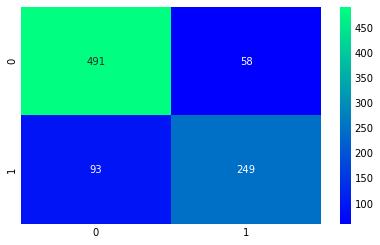

In [69]:
ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result = cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### 4) Feature Importance - 중요 변수 추출

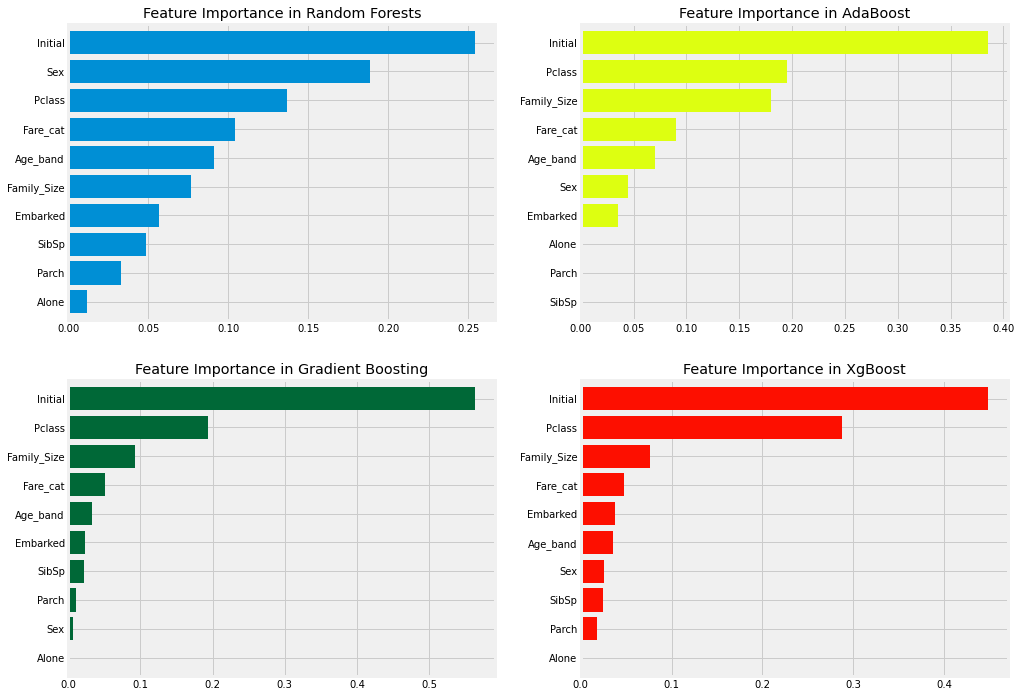

In [70]:
f,ax = plt.subplots(2,2,figsize=(15,12))

model = RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

RandomForest, AdaBoost 등과 같은 다양한 분류기의 중요 feature를 볼 수 있다.